In [1]:
# import pandas, nltk, and vader
import nltk
import pandas as pd
import os
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import re
import sys
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load tweets into a dataframe
df18 = pd.read_json(os.path.join('condensed_2018.json'))
df17 = pd.read_json(os.path.join('condensed_2017.json'))
frames = [df18, df17]

result = pd.concat(frames)
# Reset index
result = result.reset_index(drop=True)

result

,source,id_str,text,created_at,retweet_count,in_reply_to_user_id_str,favorite_count,is_retweet
0,Twitter for iPhone,1079888205351145472,HAPPY NEW YEAR! https://t.co/bHoPDPQ7G6,2018-12-31 23:53:06+00:00,33548,NaN,136012,False
1,Twitter for iPhone,1079830268708556800,"....Senator Schumer, more than a year longer t...",2018-12-31 20:02:52+00:00,17456,25073877.0,65069,False
2,Twitter for iPhone,1079830267274108928,Heads of countries are calling wanting to know...,2018-12-31 20:02:52+00:00,21030,NaN,76721,False
3,Twitter for iPhone,1079763923845419008,It’s incredible how Democrats can all use thei...,2018-12-31 15:39:15+00:00,29610,NaN,127485,False
4,Twitter for iPhone,1079763419908243456,"I’m in the Oval Office. Democrats, come back f...",2018-12-31 15:37:14+00:00,30957,NaN,132439,False
...,...,...,...,...,...,...,...,...
6110,Twitter for iPhone,815449868739211264,RT @DonaldJTrumpJr: Happy new year everyone. #...,2017-01-01 06:49:33+00:00,6847,NaN,0,True
6111,Twitter for iPhone,815433444591304704,RT @EricTrump: 2016 was such an incredible yea...,2017-01-01 05:44:17+00:00,6941,NaN,0,True
6112,Twitter for iPhone,815433217595547648,RT @Reince: Happy New Year + God's blessings t...,2017-01-01 05:43:23+00:00,7144,NaN,0,True
6113,Twitter for iPhone,815432169464197120,RT @DanScavino: On behalf of our next #POTUS &...,2017-01-01 05:39:13+00:00,5548,NaN,0,True


In [3]:
result

,source,id_str,text,created_at,retweet_count,in_reply_to_user_id_str,favorite_count,is_retweet
0,Twitter for iPhone,1079888205351145472,HAPPY NEW YEAR! https://t.co/bHoPDPQ7G6,2018-12-31 23:53:06+00:00,33548,NaN,136012,False
1,Twitter for iPhone,1079830268708556800,"....Senator Schumer, more than a year longer t...",2018-12-31 20:02:52+00:00,17456,25073877.0,65069,False
2,Twitter for iPhone,1079830267274108928,Heads of countries are calling wanting to know...,2018-12-31 20:02:52+00:00,21030,NaN,76721,False
3,Twitter for iPhone,1079763923845419008,It’s incredible how Democrats can all use thei...,2018-12-31 15:39:15+00:00,29610,NaN,127485,False
4,Twitter for iPhone,1079763419908243456,"I’m in the Oval Office. Democrats, come back f...",2018-12-31 15:37:14+00:00,30957,NaN,132439,False
...,...,...,...,...,...,...,...,...
6110,Twitter for iPhone,815449868739211264,RT @DonaldJTrumpJr: Happy new year everyone. #...,2017-01-01 06:49:33+00:00,6847,NaN,0,True
6111,Twitter for iPhone,815433444591304704,RT @EricTrump: 2016 was such an incredible yea...,2017-01-01 05:44:17+00:00,6941,NaN,0,True
6112,Twitter for iPhone,815433217595547648,RT @Reince: Happy New Year + God's blessings t...,2017-01-01 05:43:23+00:00,7144,NaN,0,True
6113,Twitter for iPhone,815432169464197120,RT @DanScavino: On behalf of our next #POTUS &...,2017-01-01 05:39:13+00:00,5548,NaN,0,True


In [4]:
# drop retweets
dfRt = result[~result.text.str.startswith('RT')]

In [5]:
dfRt

,source,id_str,text,created_at,retweet_count,in_reply_to_user_id_str,favorite_count,is_retweet
0,Twitter for iPhone,1079888205351145472,HAPPY NEW YEAR! https://t.co/bHoPDPQ7G6,2018-12-31 23:53:06+00:00,33548,NaN,136012,False
1,Twitter for iPhone,1079830268708556800,"....Senator Schumer, more than a year longer t...",2018-12-31 20:02:52+00:00,17456,25073877.0,65069,False
2,Twitter for iPhone,1079830267274108928,Heads of countries are calling wanting to know...,2018-12-31 20:02:52+00:00,21030,NaN,76721,False
3,Twitter for iPhone,1079763923845419008,It’s incredible how Democrats can all use thei...,2018-12-31 15:39:15+00:00,29610,NaN,127485,False
4,Twitter for iPhone,1079763419908243456,"I’m in the Oval Office. Democrats, come back f...",2018-12-31 15:37:14+00:00,30957,NaN,132439,False
...,...,...,...,...,...,...,...,...
6105,Twitter for Android,815990335318982656,Various media outlets and pundits say that I t...,2017-01-02 18:37:10+00:00,9057,NaN,47285,False
6106,Twitter for Android,815989154555297792,"@CNN just released a book called ""Unprecedente...",2017-01-02 18:32:29+00:00,3948,759251.0,13862,False
6107,Twitter for Android,815973752785793024,"Chicago murder rate is record setting - 4,331 ...",2017-01-02 17:31:17+00:00,17411,NaN,63340,False
6108,Twitter for Android,815930688889352192,"Well, the New Year begins. We will, together, ...",2017-01-02 14:40:10+00:00,29248,NaN,124024,False


In [6]:
# setting text column to a varible
sentences = dfRt["text"]

In [7]:
#type(sentences)
sentences[1]

'....Senator Schumer, more than a year longer than any other Administration in history. These are people who have been approved by committees and all others, yet Schumer continues to hold them back from serving their Country! Very Unfair!'

In [8]:
dfRt = result[~result.text.str.startswith('RT')]
tokens = []
caps = []
from nltk.tokenize import word_tokenize

dfRt["caps"]= 0

# tokenize sentences
for s in dfRt.iterrows():
    for t in s[1]["text"].split(" "):
        if t.isupper():
            dfRt["caps"][s[0]] = 1
      
       


         
# df = pd.DataFrame({'Title':['test','Test',np.nan, 'a']})
# df['Test_Flag'] = np.where(df['Title'].str.contains("test", case=False, na=False), 'T', '')
# print (df)
# capWords = [x.lower() for x in caps]

# def remove_emoji(string):
#     emoji_pattern = re.compile("["
#                            u"\U0001F600-\U0001F64F"  # emoticons
#                            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#                            u"\U0001F680-\U0001F6FF"  # transport & map symbols
#                            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                            u"\U00002702-\U000027B0"
#                            u"\U000024C2-\U0001F251"
#                            "]+", flags=re.UNICODE)
#     return emoji_pattern.sub(r'', string)

# words = [remove_emoji(x) for x in capWords]
  
# stop_words = set(stopwords.words('english')) 
  
# filtered_caps = [w for w in words if not w in stop_words] 
   


# df_fc= pd.DataFrame(filtered_caps)
# df_fc["filtered_caps"]= pd.DataFrame(filtered_caps)

dfRt
# print (caps)

/Users/Ed/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/Ed/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/Ed/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

,source,id_str,text,created_at,retweet_count,in_reply_to_user_id_str,favorite_count,is_retweet,caps
0,Twitter for iPhone,1079888205351145472,HAPPY NEW YEAR! https://t.co/bHoPDPQ7G6,2018-12-31 23:53:06+00:00,33548,NaN,136012,False,1
1,Twitter for iPhone,1079830268708556800,"....Senator Schumer, more than a year longer t...",2018-12-31 20:02:52+00:00,17456,25073877.0,65069,False,0
2,Twitter for iPhone,1079830267274108928,Heads of countries are calling wanting to know...,2018-12-31 20:02:52+00:00,21030,NaN,76721,False,0
3,Twitter for iPhone,1079763923845419008,It’s incredible how Democrats can all use thei...,2018-12-31 15:39:15+00:00,29610,NaN,127485,False,0
4,Twitter for iPhone,1079763419908243456,"I’m in the Oval Office. Democrats, come back f...",2018-12-31 15:37:14+00:00,30957,NaN,132439,False,0
...,...,...,...,...,...,...,...,...,...
6105,Twitter for Android,815990335318982656,Various media outlets and pundits say that I t...,2017-01-02 18:37:10+00:00,9057,NaN,47285,False,1
6106,Twitter for Android,815989154555297792,"@CNN just released a book called ""Unprecedente...",2017-01-02 18:32:29+00:00,3948,759251.0,13862,False,1
6107,Twitter for Android,815973752785793024,"Chicago murder rate is record setting - 4,331 ...",2017-01-02 17:31:17+00:00,17411,NaN,63340,False,0
6108,Twitter for Android,815930688889352192,"Well, the New Year begins. We will, together, ...",2017-01-02 14:40:10+00:00,29248,NaN,124024,False,1


In [9]:
for x in dfRt['created_at']:
    print(x)
    break


2018-12-31 23:53:06+00:00


In [10]:
# pd.to_datetime(['created_at']).astype(int) / 10**9

In [11]:
# dfRt['created_at'] = pd.to_datetime(dfRt['created_at'])

dfTts = dfRt['created_at'].apply( lambda d : d.time() )
dfRt['created_at'] = dfTts

/Users/Ed/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [12]:
dfRt

,source,id_str,text,created_at,retweet_count,in_reply_to_user_id_str,favorite_count,is_retweet,caps
0,Twitter for iPhone,1079888205351145472,HAPPY NEW YEAR! https://t.co/bHoPDPQ7G6,23:53:06,33548,NaN,136012,False,1
1,Twitter for iPhone,1079830268708556800,"....Senator Schumer, more than a year longer t...",20:02:52,17456,25073877.0,65069,False,0
2,Twitter for iPhone,1079830267274108928,Heads of countries are calling wanting to know...,20:02:52,21030,NaN,76721,False,0
3,Twitter for iPhone,1079763923845419008,It’s incredible how Democrats can all use thei...,15:39:15,29610,NaN,127485,False,0
4,Twitter for iPhone,1079763419908243456,"I’m in the Oval Office. Democrats, come back f...",15:37:14,30957,NaN,132439,False,0
...,...,...,...,...,...,...,...,...,...
6105,Twitter for Android,815990335318982656,Various media outlets and pundits say that I t...,18:37:10,9057,NaN,47285,False,1
6106,Twitter for Android,815989154555297792,"@CNN just released a book called ""Unprecedente...",18:32:29,3948,759251.0,13862,False,1
6107,Twitter for Android,815973752785793024,"Chicago murder rate is record setting - 4,331 ...",17:31:17,17411,NaN,63340,False,0
6108,Twitter for Android,815930688889352192,"Well, the New Year begins. We will, together, ...",14:40:10,29248,NaN,124024,False,1


In [13]:
import datetime
for x in dfRt['created_at']: 
#     print (datetime.strptime(x, '%H:%M:%S'))
    print ((x.hour * 60 + x.minute) * 60 + x.second)
    break

85986


In [14]:
# pd.to_datetime(['2019-01-15 13:30:00']).astype(int) / 10**9

In [15]:
X = [(x.hour * 60 + x.minute) * 60 + x.second for x in dfRt['created_at']]

In [16]:
dfRt["sec"]= X

/Users/Ed/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
dfRt.head()


,source,id_str,text,created_at,retweet_count,in_reply_to_user_id_str,favorite_count,is_retweet,caps,sec
0,Twitter for iPhone,1079888205351145472,HAPPY NEW YEAR! https://t.co/bHoPDPQ7G6,23:53:06,33548,NaN,136012,False,1,85986
1,Twitter for iPhone,1079830268708556800,"....Senator Schumer, more than a year longer t...",20:02:52,17456,25073877.0,65069,False,0,72172
2,Twitter for iPhone,1079830267274108928,Heads of countries are calling wanting to know...,20:02:52,21030,NaN,76721,False,0,72172
3,Twitter for iPhone,1079763923845419008,It’s incredible how Democrats can all use thei...,15:39:15,29610,NaN,127485,False,0,56355
4,Twitter for iPhone,1079763419908243456,"I’m in the Oval Office. Democrats, come back f...",15:37:14,30957,NaN,132439,False,0,56234


In [18]:
# for s in dfRt.iterrows():
#     for t in s[1]["text"]:
#         print(len(t))
#         dfRt["size"][s[0]] = s.str.len(t)
    
    # tokenize sentences
# for s in dfRt.iterrows():
#     for t in s[1]["text"].split(" "):
#         if t.isupper():
#             dfRt["caps"][s[0]] = 1

In [19]:
from sklearn.model_selection import train_test_split
y= dfRt['caps']
X= dfRt['sec']
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.20)
print(X_train.shape, y_train.shape)

(4272,) (4272,)


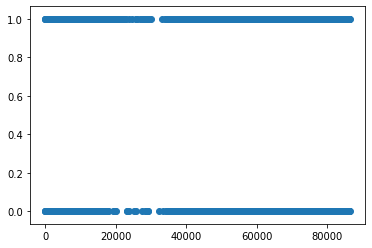

In [20]:
plt.scatter(X_train, y_train)

In [21]:
# X_train= X_train.reshape(-1, 1)
# y_train= y_train.reshape(-1, 1)
# X_test = X_test.reshape(-1, 1)
# y_test= y_train.reshape(-1, 1)


In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
model.fit(X_train, y_train)
print(model)

ValueError: Expected 2D array, got 1D array instead:
array=[60571   189 13912 ... 52732  6905 49054].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

In [ ]:
predictions = model.predict(X_test)
print(f"True output: {y_test[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

In [ ]:
### Define simple space tokenizer
translator = str.maketrans('', '', string.punctuation)
tk = tokenize.simple.SpaceTokenizer()

def simple_tokenizer(x):
    x = x.translate(translator).strip().lower()
    return tk.tokenize(x)

### Quick look at what the tokenizer produces
print(df_fc['filtered_caps'].head().apply(lambda x : simple_tokenizer(x)))

### Developing the corpus or list of sentences for processing later
corpus = df_fc['filtered_caps'].tolist()
corpus[0:5]

In [ ]:
vectorizer = TfidfVectorizer(tokenizer=simple_tokenizer, stop_words='english')
tf = vectorizer.fit(corpus)
X = tf.transform(corpus)

### Combining result of TFIDF with `target` columns
full_df = pd.concat([pd.DataFrame(X.toarray()), df['polarity']], axis=1)
print("Vector features : ", vectorizer.get_feature_names()[0:20])
print("Vector shape/size : ",X.shape)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer 
 
# settings that you use for count vectorizer will go here
tfidf_vectorizer=TfidfVectorizer(use_idf=True)
 
# just send in all your docs here
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(filtered_caps)

In [ ]:
print(tfidf_vectorizer_vectors)

In [ ]:

# get the first vector out (for the first document)
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[0]
 
# place tf-idf values in a pandas data frame
dfIdf = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
dfIdf.sort_values(by=["tfidf"],ascending=True)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    norm=None,
    vocabulary=filtered_caps)  

list_contents =[]
for index, row in df.iterrows():
    list_contents.append(' '.join(row.Tokens))

# this matrix will have only 3 columns because we have forced
# the vectorizer to use just the words foo bar and baz
# so it'll ignore all other words in the documents.
tfidf_matrix = tfidf_vectorizer.fit_transform(list_contents) 

In [ ]:
sentences = sentences.to_string()

In [ ]:
# tokenize text column
from nltk import tokenize
sentences = tokenize.sent_tokenize(sentences)

In [ ]:

import nltk
nltk.download('vader_lexicon')

In [ ]:
sid = SentimentIntensityAnalyzer()

In [ ]:
for sentence in sentences:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
        print()

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          include_cm=False,
                          fig_size=(10, 8)):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    from sklearn.utils.multiclass import unique_labels
    
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    if include_cm:
        print(cm)

    fig, ax = plt.subplots(figsize=fig_size)
    ax.grid(False)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Lets use a base model to get a baseline prediction.

In [ ]:
clf = MultinomialNB().fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
print("Accuracy of base model is {:.2f} %".format(accuracy_score(y_test, y_pred)*100))

In [ ]:
### Plot confusion matrix to get a feel for model ability to predict correct label.
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Confusion matrix, with normalization', fig_size=(10, 8));

**Another try**, let's try out using a Random Forest model.

In [ ]:
clf = RandomForestClassifier(n_estimators=200, max_depth=8, random_state=SEED).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
print("Accuracy of base model is {:.2f} %".format(accuracy_score(y_test, y_pred)*100))

In [ ]:
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Confusion matrix, with normalization', fig_size=(10, 8));

## Single Input Examples

In [ ]:
review = "This food was absolutely the worst thing I have ever eaten, stomach thought I was eating Taco Bell and tongue thought I was eating dirt."

### Transform Review
review_transformed = tf.transform([review])

### Make Prediction
pred = clf.predict(review_transformed)

### Using the defined `class_names` get the predicted Polarity ( negative/positive )
print("Review was {}".format(class_names[pred[0]]))

In [ ]:
review = "Best tacos I have ever had, will come back every Tuesday.  Will never go to any other taco shop again."

### Transform Review
review_transformed = tf.transform([review])

### Make Prediction
pred = clf.predict(review_transformed)

### Using the defined `class_names` get the predicted Polarity ( negative/positive )
print("Review was {}".format(class_names[pred[0]]))

## Extra Extra Content : Comparing Multiple Models Side by Side

Example found [here](https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f).  Interesting final reference.

In [ ]:
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=200, max_depth=8, random_state=SEED),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0, solver='lbfgs'),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

### Gather all features (X values) and labels (y values) to pass through cross validation
features = full_df.drop(target_col, axis=1)
labels = df[target_col].values

for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()